In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("train.csv")   # or your dataset name
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape


(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

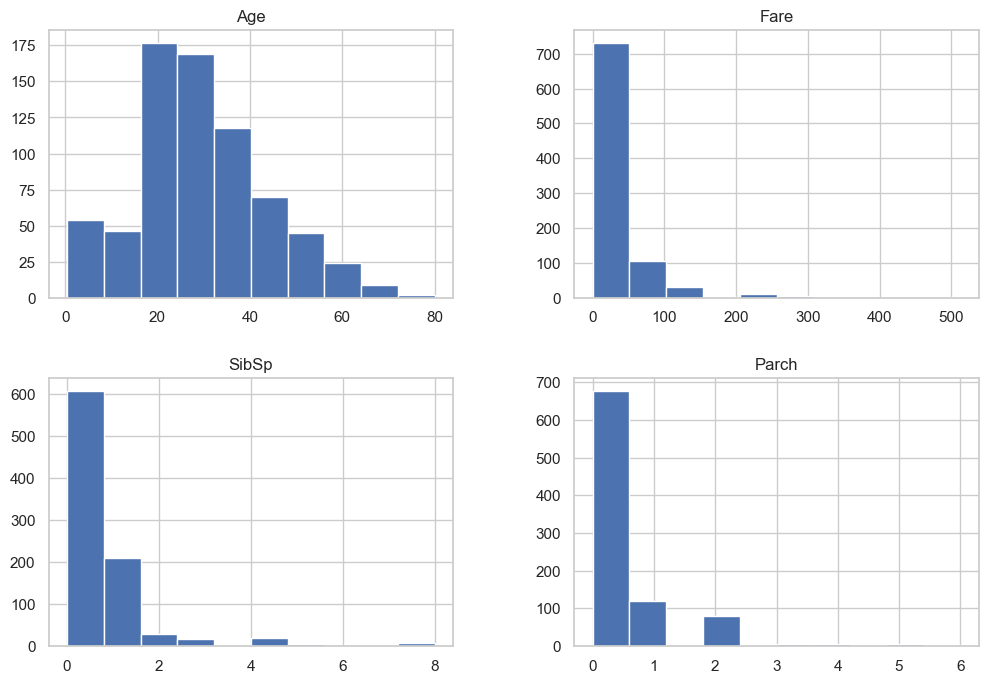

In [20]:
df[['Age','Fare','SibSp','Parch']].hist(figsize=(12,8))
plt.show()

In [ ]:
# - Histogram Observations — Age, Fare, SibSp, Parch
# 1) Age :
# Most passengers are between 20–40 years old.
# Very few children and elderly passengers.
# Missing values exist, which is typical for Titanic data.

# 2) Fare : 
# Highly right-skewed distribution.
# Majority paid less than 100.
# A few very high fares indicate 1st class luxury tickets.

# 3) SibSp :
# Most passengers traveled alone or with 1 sibling/spouse.
# Very few had more than 3.

# 4) Parch :
# Most passengers traveled without parents/children.
# Some traveled with small families but rare.

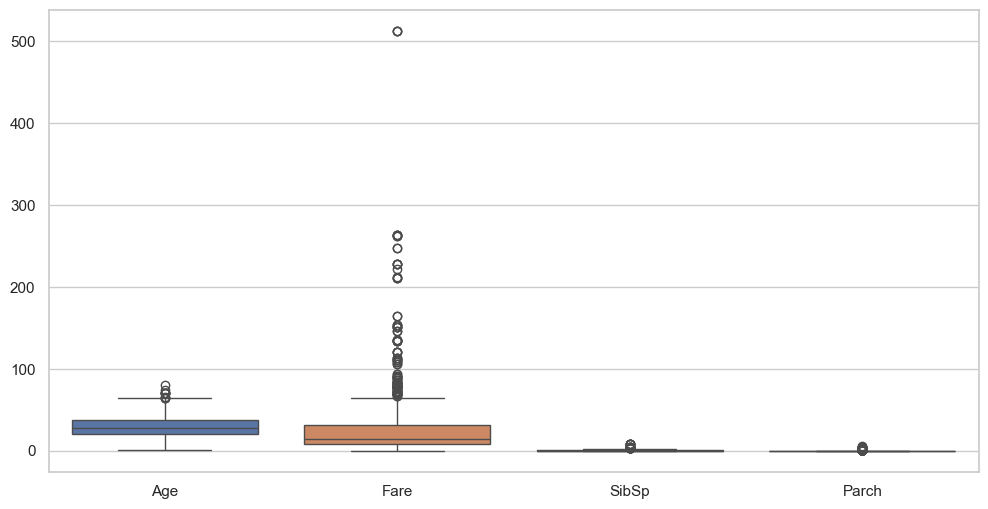

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','Fare','SibSp','Parch']])
plt.show()

In [ ]:
# - Boxplot Observations — Age, Fare, SibSp, Parch

# 1) Fare has many outliers → first-class passengers.
# 2) Age shows moderate outliers (infants + elderly).
# 3) SibSp and Parch are heavily skewed → most values are near 0.

Text(0.5, 1.0, 'Survival Count by Sex')

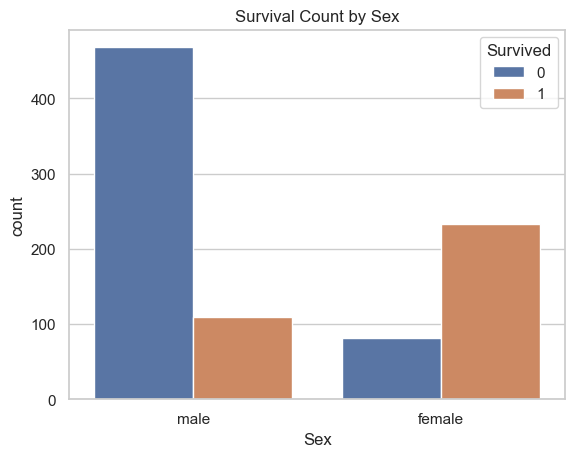

In [22]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")

In [ ]:
# - Survived vs Sex (Countplot)

# 1) Females survived at much higher rates than males.
# 2) Strong gender-based survival advantage.
# 3) A key predictor for the model.

Text(0.5, 1.0, 'Survival Count by Passenger Class')

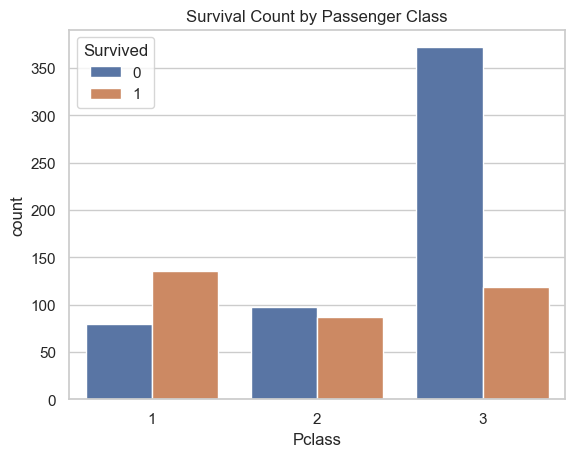

In [23]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")

In [ ]:
# - Survived vs Pclass (Countplot)

# 1) 1st class passengers survived the most.
# 2) 3rd class passengers survived the least.
# 3) Socioeconomic status strongly influenced survival.

Text(0.5, 1.0, 'Age vs Fare')

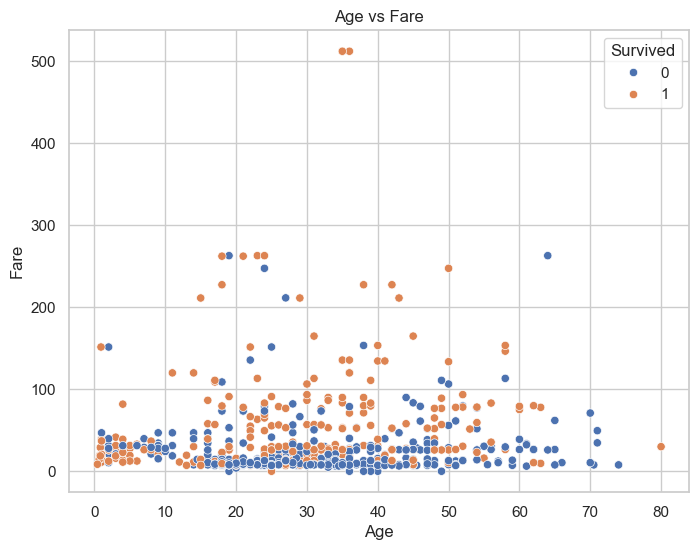

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare")

In [ ]:
# - Scatterplot — Age vs Fare (hue = Survived)

# 1) Many high-fare individuals survived → mostly first class.
# 2) Survivors cluster around low to mid ages but visible across all ages.
# 3) Younger passengers slightly more likely to survive.

Text(0.5, 1.0, 'Correlation Heatmap')

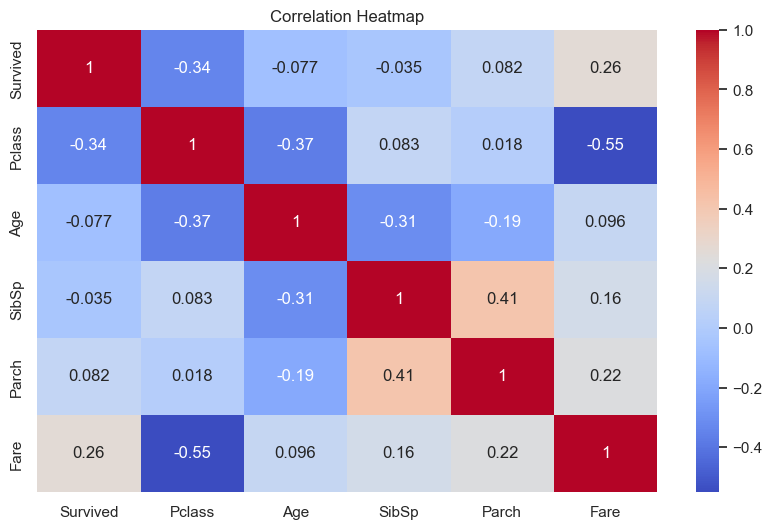

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [ ]:
# - Correlation Heatmap Observations

# 1) Pclass and Fare are strongly negatively correlated (expected).
# 2) Survived has moderate correlation with:
# 3) Fare → more fare = more survival
# 4) Pclass (negative) → lower class = less survival
# 5) Family features (SibSp, Parch) have low correlation but give insights.

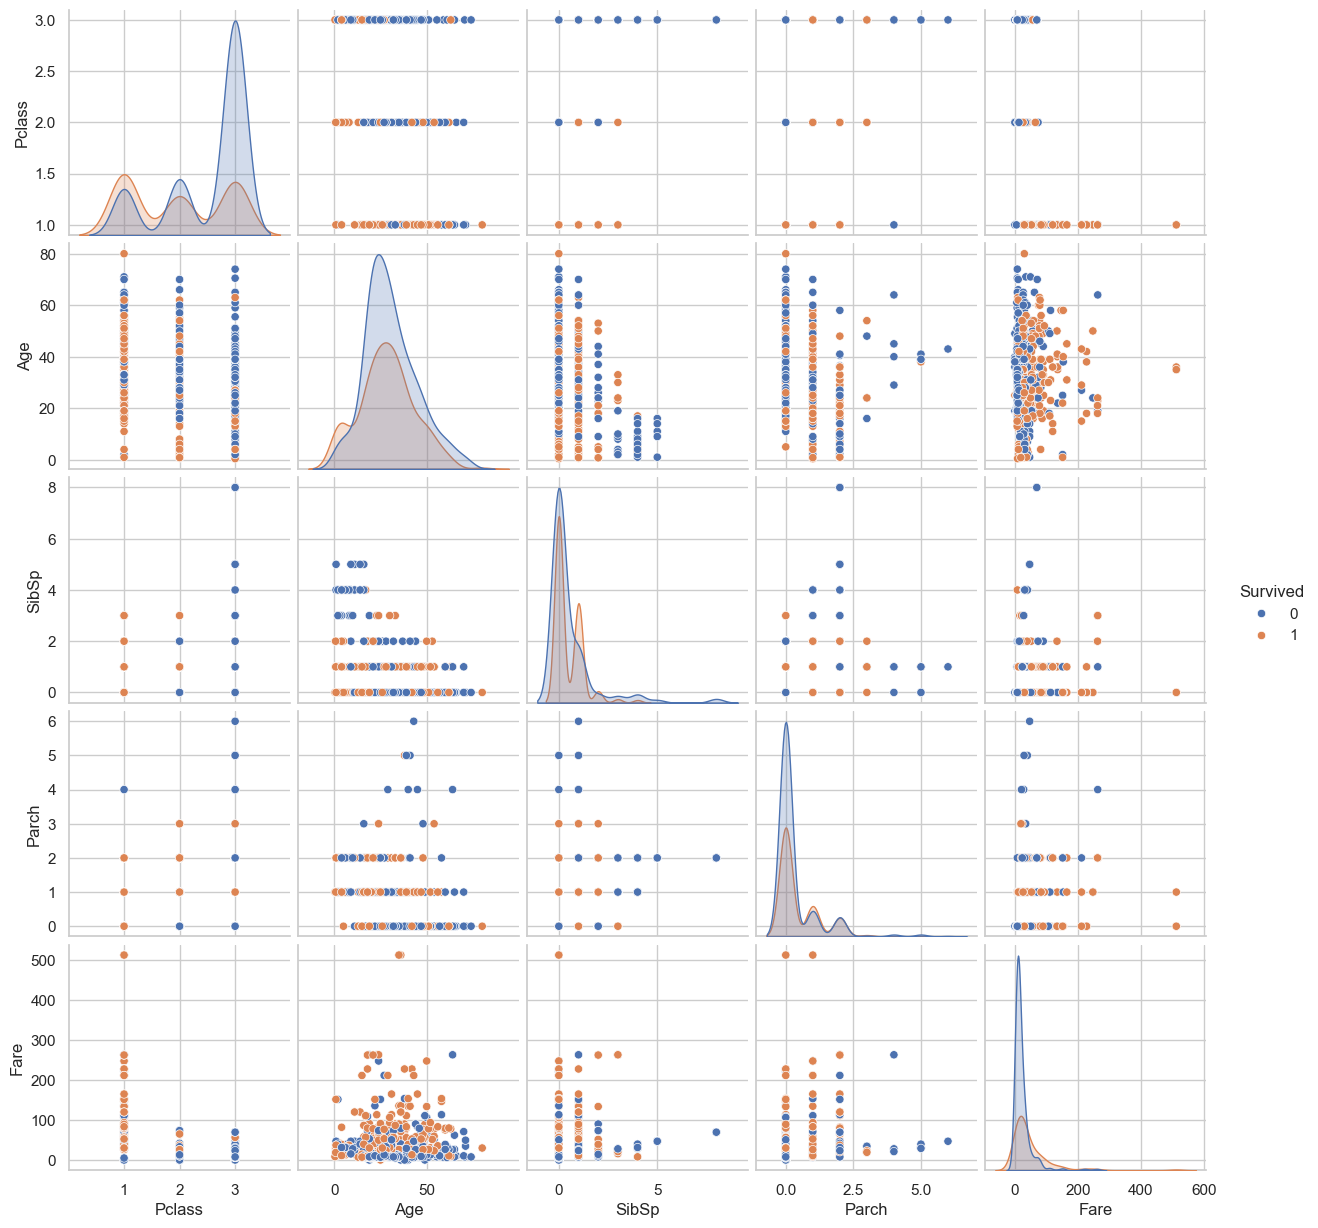

In [26]:
sns.pairplot(df[['Survived','Pclass','Age','SibSp','Parch','Fare']], 
             hue='Survived')

In [ ]:
# - Pairplot Observations: 

# 1) Survivors appear more among:
#     Lower Pclass (1st class)
#     Higher Fare
#     Moderate age groups

# 2) Many non-survivors cluster in:
#     3rd class
#     Low fare zone

In [34]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# - Missing Value Treatment Observations

# 1) Filling Age with median is appropriate for skewed data.
# 2) Filling Embarked with mode is standard since missing values are very few.

In [37]:
# - Final Summary:
# The Titanic dataset provides demographic, travel, and survival information for 891 passengers. A detailed EDA reveals several important insights:
# 1) Gender played a major role: Females had a significantly higher survival rate than males.

# 2) Class mattered: First-class passengers survived more than second and third class.

# 3) Fare displayed strong influence: Higher fare amounts were linked to higher survival rates, suggesting priority evacuation for wealthy passengers.

# 4) Age distribution: Majority were young adults. Children had a slightly better chance of survival.

# 5) Family size: Most passengers traveled alone. Large families had lower survival probabilities.

# 6) Missing data: Age had considerable missing values, while Cabin had the most and was mostly unusable.

# Overall, socioeconomic status (Pclass), fare paid, and gender were the strongest determinants of survival.